# Preparation

In [1]:
# import libraries
try:
  # %tensorflow_version only exists in Colab.
  !pip install tf-nightly
except Exception:
  pass
import tensorflow as tf
import pandas as pd
from tensorflow import keras
!pip install tensorflow-datasets
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 601.9/601.9 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 106.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 44.3 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.18.0 requires ml-dtypes<0.5.0,>=0.4.0, but you have ml-dtypes 0.5.1 which is incompatible.
2.20.0-dev20250516


In [2]:
# get data files
!wget https://cdn.freecodecamp.org/project-data/sms/train-data.tsv
!wget https://cdn.freecodecamp.org/project-data/sms/valid-data.tsv

train_file_path = "train-data.tsv"
test_file_path = "valid-data.tsv"

--2025-05-19 05:33:05--  https://cdn.freecodecamp.org/project-data/sms/train-data.tsv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.2.33, 172.67.70.149, 104.26.3.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.2.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 358233 (350K) [text/tab-separated-values]
Saving to: ‘train-data.tsv’

train-data.tsv      100%[===================>] 349.84K  --.-KB/s    in 0.08s   

2025-05-19 05:33:06 (4.17 MB/s) - ‘train-data.tsv’ saved [358233/358233]

--2025-05-19 05:33:06--  https://cdn.freecodecamp.org/project-data/sms/valid-data.tsv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.2.33, 172.67.70.149, 104.26.3.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.2.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 118774 (116K) [text/tab-separated-values]
Saving to: ‘valid-data.tsv’

valid-data.tsv      100%[==============

## Import the Data

In [3]:
# กำหนดชื่อคอลัมน์สำหรับข้อมูล
column_names = ['label', 'message']  # คอลัมน์แรกคือประเภท (ham/spam) คอลัมน์ที่สองคือข้อความ SMS

# อ่านข้อมูลฝึกฝนเข้ามาเป็น DataFrame โดยใช้ tab ("\t") เป็นตัวคั่นข้อมูลและกำหนดชื่อคอลัมน์
train_data = pd.read_csv(train_file_path, sep="\t", names=column_names)
train_data.head()  # แสดง 5 แถวแรกของข้อมูลฝึกฝนเพื่อตรวจสอบ

,label,message
0,ham,ahhhh...just woken up!had a bad dream about u ...
1,ham,you can never do nothing
2,ham,"now u sound like manky scouse boy steve,like! ..."
3,ham,mum say we wan to go then go... then she can s...
4,ham,never y lei... i v lazy... got wat? dat day ü ...


In [4]:
# อ่านข้อมูลทดสอบเข้ามาเป็น DataFrame เช่นเดียวกับข้อมูลฝึกฝน
test_data = pd.read_csv(test_file_path, sep="\t", names=column_names)
test_data.head()  # แสดง 5 แถวแรกของข้อมูลทดสอบเพื่อตรวจสอบ

,label,message
0,ham,i am in hospital da. . i will return home in e...
1,ham,"not much, just some textin'. how bout you?"
2,ham,i probably won't eat at all today. i think i'm...
3,ham,don‘t give a flying monkeys wot they think and...
4,ham,who are you seeing?


In [5]:
# แสดงข้อมูลเพิ่มเติมเกี่ยวกับชุดข้อมูลฝึกฝน
train_data.info()
# ผลลัพธ์จะแสดงจำนวนแถว ชนิดข้อมูลของแต่ละคอลัมน์ และหน่วยความจำที่ใช้

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4179 entries, 0 to 4178
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    4179 non-null   object
 1   message  4179 non-null   object
dtypes: object(2)
memory usage: 65.4+ KB


In [6]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1392 entries, 0 to 1391
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    1392 non-null   object
 1   message  1392 non-null   object
dtypes: object(2)
memory usage: 21.9+ KB


<Axes: xlabel='label'>

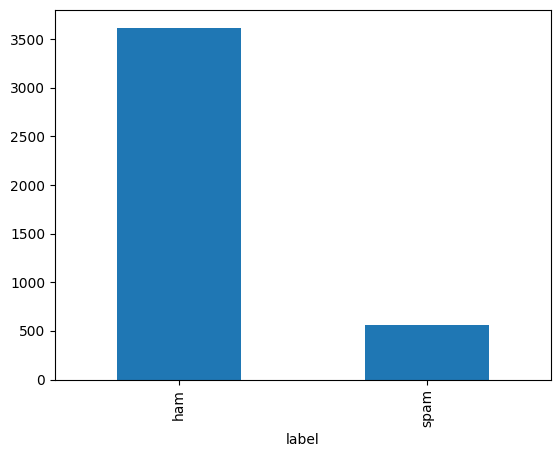

In [7]:
# แสดงกราฟแท่งเพื่อดูการกระจายของข้อมูล (ham vs spam) ในชุดข้อมูลฝึกฝน
train_data['label'].value_counts().plot.bar()
# จากกราฟจะเห็นว่าข้อมูลไม่สมดุล - มี ham (ข้อความปกติ) มากกว่า spam (ข้อความขยะ) มาก

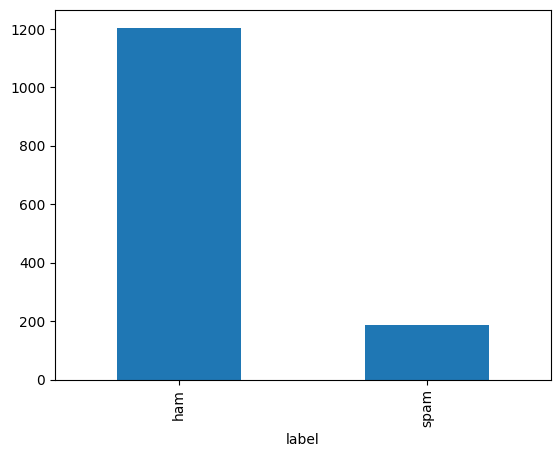

In [8]:
test_data['label'].value_counts().plot.bar();

## Undersampling

เนื่องจากข้อมูลของเราอยู่ในสถานะไม่สมดุล เราจะแก้ปัญหานี้โดยใช้วิธีการสุ่มตัวอย่างไม่เพียงพอ

In [9]:
# การแก้ปัญหาข้อมูลไม่สมดุลด้วยวิธี Undersampling

from imblearn.under_sampling import RandomUnderSampler  # นำเข้าไลบรารีสำหรับทำ undersampling
from collections import Counter  # ใช้สำหรับนับจำนวนแต่ละประเภท

# แยกข้อมูลเป็นคุณลักษณะ (X) และฉลาก (y)
X_train = train_data["message"]  # คุณลักษณะคือข้อความ SMS
y_train = train_data["label"]    # ฉลากคือ ham หรือ spam

X_test = test_data["message"]    # คุณลักษณะทดสอบ
y_test = test_data["label"]      # ฉลากทดสอบ

# ทำ undersampling เพื่อแก้ปัญหาความไม่สมดุลของข้อมูลในชุดฝึกฝน
# โดยจะสุ่มลดจำนวนของประเภทที่มีข้อมูลมากเกินไป (ham) ให้เท่ากับประเภทที่มีข้อมูลน้อย (spam)
under_sampler = RandomUnderSampler(random_state=42)  # กำหนด random seed เพื่อให้ผลลัพธ์คงที่
X_train_resampled, y_train_resampled = under_sampler.fit_resample(X_train.to_frame(), y_train)

X_train_resampled = X_train_resampled.squeeze()  # แปลงกลับเป็น Series จาก DataFrame

# ตรวจสอบการกระจายของประเภทหลังทำ undersampling
print("Class distribution after undersampling (train dataset):", Counter(y_train_resampled))
# ผลลัพธ์จะแสดงว่าตอนนี้มีจำนวน ham และ spam เท่ากัน

Class distribution after undersampling (train dataset): Counter({'ham': 560, 'spam': 560})


<Axes: xlabel='label'>

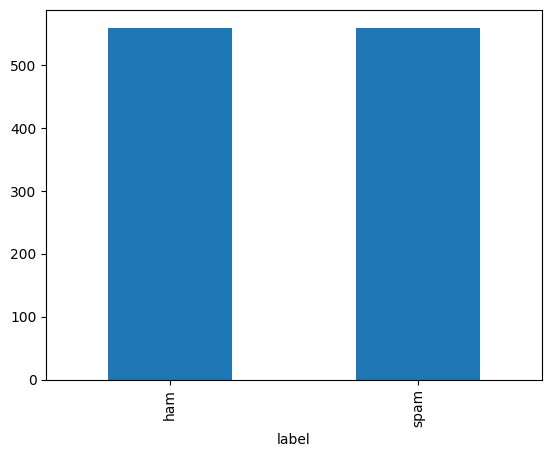

In [10]:
# แสดงกราฟการกระจายของข้อมูลหลังทำ undersampling

y_train_resampled.value_counts().plot.bar()
# กราฟจะแสดงให้เห็นว่าข้อมูลมีความสมดุลแล้ว ham และ spam มีจำนวนเท่ากัน

## Data Transformation

In [12]:
# การแปลงข้อมูลข้อความให้เป็นตัวเลขที่โมเดลเข้าใจได้

# เปลี่ยนการนำเข้าจาก keras.preprocessing เป็น tensorflow.keras.preprocessing
from tensorflow.keras.preprocessing.text import Tokenizer  # ใช้แปลงข้อความเป็น token
from tensorflow.keras.preprocessing.sequence import pad_sequences  # ใช้ปรับความยาวของ sequence ให้เท่ากัน

# สร้าง tokenizer และฝึกบน X_train_resampled
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train_resampled)  # เรียนรู้คำศัพท์จากข้อความฝึกฝน

# แปลงข้อความเป็นลำดับของเลขจำนวนเต็ม (sequences)
train_sequences = tokenizer.texts_to_sequences(X_train_resampled)
test_sequences = tokenizer.texts_to_sequences(X_test)

# ปรับความยาวของ sequence ให้เท่ากันทั้งหมด (padding)
max_sequence_length = max(max(len(sequence) for sequence in train_sequences), max(len(sequence) for sequence in test_sequences))
padded_train_sequences = pad_sequences(train_sequences, maxlen=max_sequence_length, padding="post")
padded_test_sequences = pad_sequences(test_sequences, maxlen=max_sequence_length, padding="post")

In [18]:
# แปลงฉลาก (ham/spam) เป็นตัวเลข (0/1)
label_mapping = {label: index for index, label in enumerate(train_data["label"].unique())}  # สร้าง dictionary การแปลง
train_numerical_labels = y_train_resampled.map(label_mapping)  # แปลงฉลากข้อมูลฝึกฝน
test_numerical_labels = y_test.map(label_mapping)  # แปลงฉลากข้อมูลทดสอบ

# Build the Model

In [13]:
# สร้างโมเดล LSTM แบบสองทิศทาง (Bidirectional)

model = tf.keras.models.Sequential()  # สร้างโมเดลแบบเรียงลำดับ

# เพิ่มเลเยอร์ Embedding เพื่อแปลงตัวเลขที่แทนคำให้เป็นเวกเตอร์มิติสูง
model.add(tf.keras.layers.Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=128, input_length=max_sequence_length))

# เพิ่มเลเยอร์ LSTM แบบสองทิศทาง (สามารถเรียนรู้ความสัมพันธ์ของข้อความทั้งจากซ้ายไปขวาและขวาไปซ้าย)
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)))

# เลเยอร์สุดท้ายเป็นเลเยอร์ Dense 1 โหนด กับ activation function แบบ sigmoid (ให้ผลลัพธ์เป็นค่าความน่าจะเป็น 0-1)
model.add(tf.keras.layers.Dense(1, activation="sigmoid"))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [14]:
# compile
model.compile(
    loss="binary_crossentropy",  # ฟังก์ชันการสูญเสียสำหรับการจำแนกแบบไบนารี (2 ประเภท)
    optimizer="adam",  # อัลกอริทึมการเรียนรู้
    metrics=["accuracy"]  # ใช้ accuracy เป็นเมตริกในการวัดผล
)

In [16]:
# แสดงโครงสร้างโมเดล
model.summary()
# ผลลัพธ์จะแสดงรายละเอียดของแต่ละเลเยอร์ จำนวนพารามิเตอร์ และขนาดเอาต์พุต

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [19]:
## Train the model

model.fit(
    padded_train_sequences,        # ข้อมูล input ที่ใช้ฝึกฝน
    train_numerical_labels,        # ฉลากเป้าหมาย
    validation_data=(padded_test_sequences, test_numerical_labels),  # ข้อมูลสำหรับตรวจสอบความแม่นยำระหว่างฝึกฝน
    epochs=5,                       # จำนวนรอบในการฝึกฝน
    batch_size=32                  # ขนาดแบตช์
)
# ผลลัพธ์จะแสดงค่า loss และ accuracy ทั้งในชุดฝึกฝนและชุดตรวจสอบในแต่ละ epoch

Epoch 1/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 14s 292ms/step - accuracy: 0.6772 - loss: 0.6122 - val_accuracy: 0.8872 - val_loss: 0.3101
Epoch 2/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 10s 277ms/step - accuracy: 0.9268 - loss: 0.2134 - val_accuracy: 0.9734 - val_loss: 0.1146
Epoch 3/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 12s 334ms/step - accuracy: 0.9769 - loss: 0.0862 - val_accuracy: 0.9626 - val_loss: 0.1311
Epoch 4/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 19s 274ms/step - accuracy: 0.9958 - loss: 0.0320 - val_accuracy: 0.9777 - val_loss: 0.0818
Epoch 5/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 11s 292ms/step - accuracy: 0.9997 - loss: 0.0126 - val_accuracy: 0.9670 - val_loss: 0.1119


## Evaluate the model

In [20]:
# ประเมินโมเดลกับชุดข้อมูลทดสอบ
loss, accuracy = model.evaluate(padded_test_sequences, test_numerical_labels)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")
# ผลลัพธ์จะแสดงค่า loss และ accuracy สุดท้ายบนชุดข้อมูลทดสอบ

44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.9652 - loss: 0.1193
Test Loss: 0.1119, Test Accuracy: 0.9670


# Submission

In [21]:
# ฟังก์ชันสำหรับทำนายว่าข้อความเป็น spam หรือ ham
def predict_message(pred_text):
    # ตรวจสอบว่าอินพุตเป็นรายการหรือไม่ ถ้าไม่ใช่ให้แปลงเป็นรายการ
    if not isinstance(pred_text, list):
        pred_text = [pred_text]

    # แปลงข้อความเป็น sequence และทำ padding
    sequences = tokenizer.texts_to_sequences(pred_text)
    padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length, padding="post")

    # ทำนายด้วยโมเดล
    predictions = model.predict(padded_sequences)

    # แปลงค่าความน่าจะเป็นเป็นประเภท (0 หรือ 1)
    predicted_labels = (predictions > 0.5).astype(int)

    # รวมผลลัพธ์ให้อยู่ในรูปแบบ [ค่าความน่าจะเป็น, ประเภท]
    results = [[float(prediction), "spam" if label == 1 else "ham"] for prediction, label in zip(predictions, predicted_labels)]

    # ถ้ามีผลลัพธ์เพียงรายการเดียว ให้ส่งคืนเฉพาะรายการนั้น
    if len(results) == 1:
      result = results[0]
    else:
      result = results

    return result

# ทดสอบฟังก์ชันกับข้อความตัวอย่าง
pred_text = "how are you doing today?"
prediction = predict_message(pred_text)
print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step
[0.015031238086521626, 'ham']


<ipython-input-21-a028839995a1>:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  results = [[float(prediction), "spam" if label == 1 else "ham"] for prediction, label in zip(predictions, predicted_labels)]


In [22]:
# ฟังก์ชันทดสอบโมเดลกับข้อความตัวอย่างหลายข้อความ
def test_predictions():
  # รายการข้อความทดสอบ
  test_messages = ["how are you doing today",
                   "sale today! to stop texts call 98912460324",
                   "i dont want to go. can we try it a different day? available sat",
                   "our new mobile video service is live. just install on your phone to start watching.",
                   "you have won £1000 cash! call to claim your prize.",
                   "i'll bring it tomorrow. don't forget the milk.",
                   "wow, is your arm alright. that happened to me one time too"
                  ]

  # คำตอบที่ถูกต้องสำหรับแต่ละข้อความ
  test_answers = ["ham", "spam", "ham", "spam", "spam", "ham", "ham"]
  passed = True

  # ทดสอบทีละข้อความและตรวจสอบว่าโมเดลทำนายถูกต้องหรือไม่
  for msg, ans in zip(test_messages, test_answers):
    print(ans)  # แสดงคำตอบที่ถูกต้อง
    prediction = predict_message(msg)  # ทำนายด้วยโมเดล
    print(prediction)  # แสดงผลการทำนาย
    if prediction[1] != ans:  # ตรวจสอบว่าทำนายถูกต้องหรือไม่
      passed = False

  # แสดงผลรวมการทดสอบ
  if passed:
    print("You passed the challenge. Great job!")
  else:
    print("You haven't passed yet. Keep trying.")

# เรียกใช้ฟังก์ชันทดสอบ
test_predictions()

ham
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
[0.015031238086521626, 'ham']
spam


<ipython-input-21-a028839995a1>:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  results = [[float(prediction), "spam" if label == 1 else "ham"] for prediction, label in zip(predictions, predicted_labels)]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
[0.8263294100761414, 'spam']
ham
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
[0.0037598011549562216, 'ham']
spam
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
[0.9905462861061096, 'spam']
spam
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
[0.9953363537788391, 'spam']
ham
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
[0.0042578731663525105, 'ham']
ham
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
[0.010355208069086075, 'ham']
You passed the challenge. Great job!
